In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

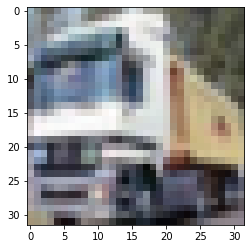

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse","ship", "truck"]

In [ ]:
def plot_sample(X, y, index):
   plt.figure(figsize = (15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])

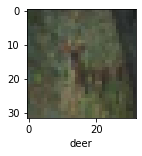

In [ ]:
plot_sample(X_train, y_train, 10)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer = 'SGD',
            loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.8147 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6234 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5414 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4816 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4309 - accuracy: 0.4956


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
y_pred = ann.predict(X_test)
y_pred__classes = [np.argmax(element) for element in y_pred]

In [ ]:
print('Classification report: \n', classification_report(y_test, y_pred_classes))

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4489 - accuracy: 0.4811
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1089 - accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9762 - accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.8822 - accuracy: 0.6931
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8190 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7648 - accuracy: 0.7351
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7106 - accuracy: 0.7523
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6705 - accuracy: 0.7687
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6249 - accuracy: 0.7813
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8902 - accuracy: 0.7127


[0.8902336955070496, 0.7127000093460083]

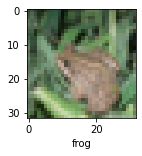

In [ ]:
plot_sample(X_test,y_test,4)